<a href="https://colab.research.google.com/github/shahfaissal/capstone-project---1/blob/main/Copy_of_Copy_of_Airbnb_faisal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

import statistics
from collections import Counter


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv")

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **5.Latitude and Longtitude**:

Latitude and longitude forms a grid system which helps to identify the exact or absolute, locations on the surface of earth.latitude and longitude can be utilised to identify specific locations,which can also be helpful in identifying landmarks

# so,lets find the latitude and longitude!


In [ ]:
df[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


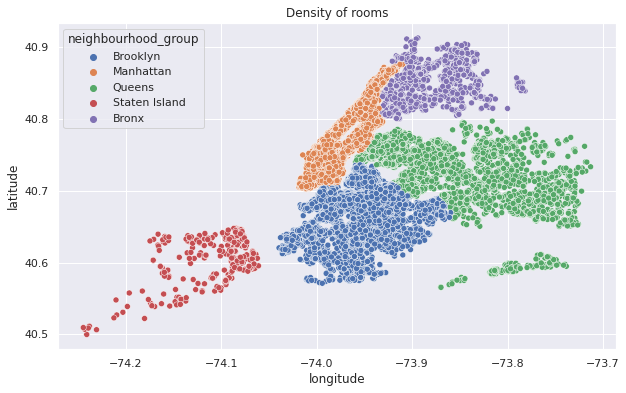

In [ ]:
# To find the density of neighbourhood acorss the location scatter plot is being used

plt.figure(figsize=(10,6))
ax_5 = sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
ax_5.set_title('Density of rooms')
ax_5.set_ylabel('latitude')
ax_5.set_xlabel('longitude')
plt.show()
# df1 = sns.load_dataset('iris')
# sns.jointplot(x=df["latitude"], y=df["longitude"], kind='scatter')
# sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
# sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')


# keynote:

1.From the scatterplot Brooklyn and Manhattan are the most dense neighbourhood_groups with hotels and apartments followed by queens island.

# 6.Room type:

There are different catagories of roomtypes available for booking.
let us analyze the most and the least type of room in the dataset.

In [ ]:
no_of_rooms = df[['room_type']].value_counts()
no_of_rooms
#percent_room

room_type      
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

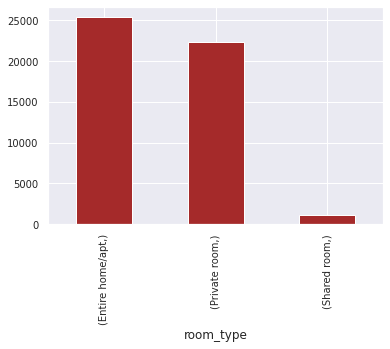

In [ ]:
bargraph = no_of_rooms.plot.bar(x = 'room_type', y = 'value_counts()', fontsize='10',color=['brown'])

**# keynote:**

1.People are more keen and interested in booking whole apartment on rent followed by Private room.

2.Very few people prefered to have shared rooms.



# 7.price:
price is one of the key and dependent variable in dataframe. 

In [5]:
df['price'].describe().T 

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [6]:
def price_catagory(price):
  if price<=80:
    return 'cheap'
  elif price>=80 and price<=500:
    return 'affordable'
  else:
    return 'Expensive'

In [7]:
df['price_catagory'] = df['price'].apply(price_catagory)
count = df['price_catagory'].value_counts()

In [15]:
room_price_catageory = df.groupby('room_type')['price_catagory'].value_counts().reset_index(name='counts')
room_price_catageory

,room_type,price_catagory,counts
0,Entire home/apt,affordable,22848
1,Entire home/apt,cheap,1668
2,Entire home/apt,Expensive,893
3,Private room,cheap,14482
4,Private room,affordable,7701
5,Private room,Expensive,143
6,Shared room,cheap,948
7,Shared room,affordable,204
8,Shared room,Expensive,8


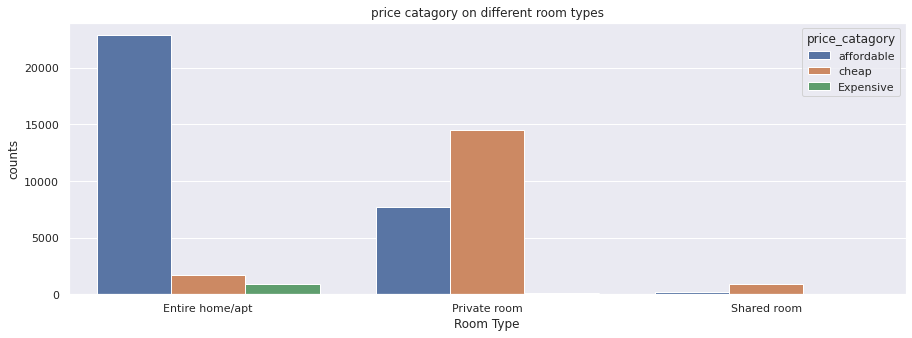

In [14]:
plt.figure(figsize = (15,5))
z = sns.barplot(y= 'counts', x= 'room_type',hue='price_catagory',data=room_price_catageory)
z.set_title('price catagory on different room types')
z.set_xlabel('Room Type')
z.set_ylabel("counts")
plt.show()
# df.groupby('year').case_status.value_counts().plot.barh()
# room_price_catageory.plot(kind= 'bar')
# plt.title('price catagory on different room types')
# room_price_catageory.plot.barh()
# plt.ylabel('room type and price catagory')
# plt.xlabel('counts')

## **keynote:**


In [ ]:
plt.barh(y, x)
plt.figure(figsize=(10,5))
h_plot = sns.countplot(x=data['price'].apply(price_catagory))
h_plot.set_title('Count Plot')
h_plot.set_xlabel('Catogories of rooms')
h_plot.set_ylabel("Count")
plt.show()